# Prediction Using Unsupervised Machine Learning

## Submitted by: Gourav Pratap Singh

# Importing All the Required Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Loading Dataset

In [99]:
df = pd.read_csv("Iris.csv")
df.set_index("Id", inplace = True)

In [100]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## Data Preprocessing

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [102]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Analyzing the Data

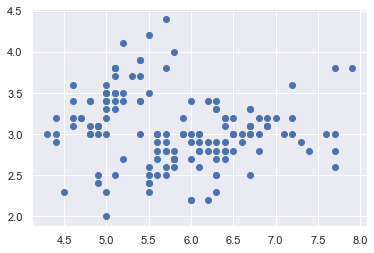

In [103]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()


## Selecting features to perform K-MEANS CLUSTERING

In [105]:
x = df.iloc[:, 0:2] #(1) clustering based on "SepalLengthCm and SepalWidthCm"
y = df.iloc[:, 2:4] #(2) clustering based on "petalLengthCm and petalWidthCm"
z = df.iloc[:, 0:4] #(3) clustering based on "SepalLengthCm,SepalWidthCm,petalLengthCm and petalWidthCm"

In [106]:
x

,SepalLengthCm,SepalWidthCm
Id,,
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6
...,...,...
146,6.7,3.0
147,6.3,2.5
148,6.5,3.0


In [107]:
y

,PetalLengthCm,PetalWidthCm
Id,,
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
...,...,...
146,5.2,2.3
147,5.0,1.9
148,5.2,2.0


In [108]:
z

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [109]:
df_cat = df.copy()
df_cat['Species'] = df_cat['Species'].map({'df-setosa' : 0, 'df-versicolor': 1, 'df-virginica':2 })
df_cat


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,NaN
2,4.9,3.0,1.4,0.2,NaN
3,4.7,3.2,1.3,0.2,NaN
4,4.6,3.1,1.5,0.2,NaN
5,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,NaN
147,6.3,2.5,5.0,1.9,NaN
148,6.5,3.0,5.2,2.0,NaN


In [110]:
a = df_cat.iloc[:, 4:]
a

,Species
Id,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
146,NaN
147,NaN
148,NaN


In [111]:
b = df_cat.iloc[:, 2:]
b

,PetalLengthCm,PetalWidthCm,Species
Id,,,
1,1.4,0.2,NaN
2,1.4,0.2,NaN
3,1.3,0.2,NaN
4,1.5,0.2,NaN
5,1.4,0.2,NaN
...,...,...,...
146,5.2,2.3,NaN
147,5.0,1.9,NaN
148,5.2,2.0,NaN


## PERFORMING CLUSTERING



In [112]:
kmeans = KMeans(2)

In [113]:
kmeans.fit(x)

KMeans(n_clusters=2)

### Clustering Results

In [114]:
Identified_clusters = kmeans.fit_predict(x)
Identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [116]:
df_with_clusters = df.copy()
df_with_clusters['cluster'] = Identified_clusters
df_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0
147,6.3,2.5,5.0,1.9,Iris-virginica,0
148,6.5,3.0,5.2,2.0,Iris-virginica,0


## Visualizing Results 

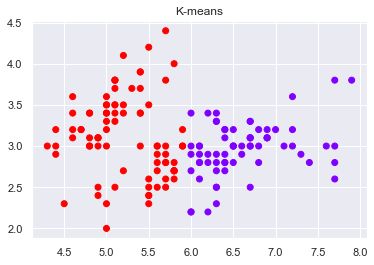

In [117]:
plt.scatter(df_with_clusters['SepalLengthCm'],df_with_clusters['SepalWidthCm'],c=df_with_clusters['cluster'],cmap='rainbow' )
plt.title('K-means')

plt.show()


## THE Elbow method(Choosing Number of clusters)

### Calculating WCSS 

In [118]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.95870982492086,
 20.949686646361823,
 17.31849871166415,
 14.628929179122284,
 12.976861958325657,
 11.090228937728941]

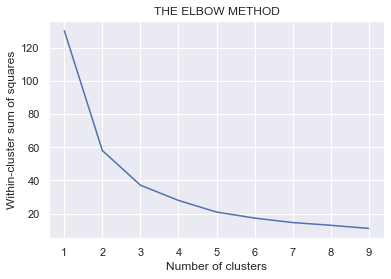

In [119]:
plt.plot(range(1,10),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()



Exploring different clustering solutions and selecting optimum number of clusters

In [120]:
kmeans_new = KMeans(3)
kmeans_new.fit(x)
clusters_new = x.copy()
clusters_new['cluster_predicted'] = kmeans_new.fit_predict(x)

In [121]:
clusters_new

,SepalLengthCm,SepalWidthCm,cluster_predicted
Id,,,
1,5.1,3.5,0
2,4.9,3.0,0
3,4.7,3.2,0
4,4.6,3.1,0
5,5.0,3.6,0
...,...,...,...
146,6.7,3.0,1
147,6.3,2.5,2
148,6.5,3.0,1


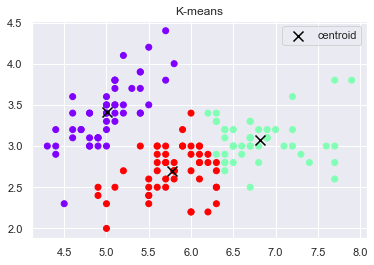

In [122]:
# Visualising the clusters - On the first two columns

plt.scatter(clusters_new['SepalLengthCm'],clusters_new['SepalWidthCm'],c=clusters_new['cluster_predicted'],cmap='rainbow' )
plt.title('K-means')

#plotting centroids
plt.scatter(kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:, 1], marker='x', s=100,c='black', label='centroid')

plt.legend()
plt.show()